# Quasar Positions

## Time to get you hands dirty!  Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.
- Just read off the maximum likelihood solution (e.g. using `np.argsort`) 
- Compare it with the MLE estimator derived above

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

## Part 1

I build the likelihood, plot them and their product

In [9]:
# Number of data (or dataset gaussianly distributed)
N = 5        

# Sigma of the data                
sigma = 0.2   
mean = 1
data = np.random.normal(mean, sigma, N)


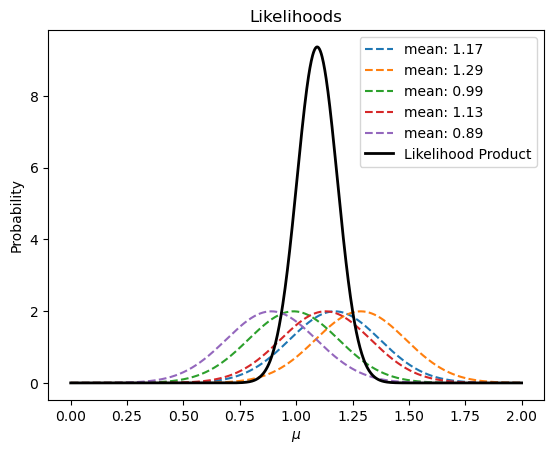

In [10]:
x = np.linspace(0, 2, 1000)
Likelihood = 1
fig = plt.figure()

# Building the likelihood and the plots of the gaussians
for i in range(N):
    
    plt.plot(x, sp.norm.pdf(x, data[i], sigma), ls = '--', label = 'mean: %.02f' %data[i])
    Likelihood *= sp.norm.pdf(x, data[i], sigma)
    
plt.plot(x, Likelihood, lw = 2, color = 'black', label = 'Likelihood Product')
plt.title('Likelihoods')
plt.xlabel('$\mu$')
plt.ylabel('Probability')
plt.legend()
plt.show()

Now we go for the maximum likelihood and compare it with the mean chosen

Mean: 1.00
Maximum Likelihood: 1.09


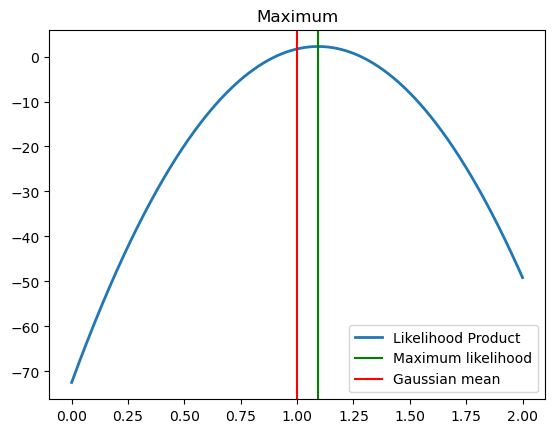

In [14]:
# argsort orders the vector in such a way that the last element is the biggest one
# it returns the indeces
max_position = np.argsort(Likelihood)[-1]
Max = x[max_position]

# THe MLE of the mean and standard deviation of the mean
# Homoschedastic errors
L_mean = np.sum(data) / N  

print('Mean: %.02f' %mean)
print('Maximum Likelihood: %.02f' %Max)

plt.plot(x, np.log(Likelihood), lw = 2, label = 'Likelihood Product')
plt.axvline(Max, c = 'green', label = 'Maximum likelihood')
plt.axvline(mean, c = 'red', label = 'Gaussian mean')
plt.title('Maximum')
#plt.ylim(np.log(Likelihood[max_position]) - 0.2, np.log(Likelihood[max_position]) + 0.2)
#plt.xlim(x[max_position] - 0.03, x[max_position] + 0.03) 
plt.legend()
plt.show()

Compute the fisher matrix with to get $\sigma$ and compare the result from MLE and the mean of the single distributions

Maximum likelihood: 1.09 Fisher sigma: 0.09
Mean of the gaussians: 1.09 sigma mean: 0.09


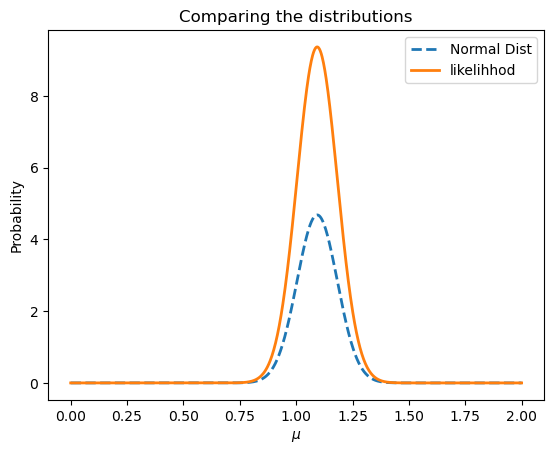

In [26]:
# Second derivative and the normalization with steps
sec_deriv = np.diff(np.log(Likelihood), n = 2) / (x[1] - x[0])**2
sigma_mu_Fisher = np.sqrt(1/sec_deriv[max_position] * (-1))

# Computing the standard deviation of the mean for homoschedastic errors
sigma_mean = sigma / np.sqrt(N)

# Normal distribution for likelihood comparison and the rescaling factor
normal_dist = sp.norm.pdf(x, L_mean, sigma_mean)
Rescaling = Likelihood[max_position] / normal_dist[np.argsort(normal_dist)[-1]] * 0.5 # If no 0.5: they are superimposable

print('Maximum likelihood: %.02f' %Max, 'Fisher sigma: %.02f' %sigma_mu_Fisher)
print('Mean of the gaussians: %.02f' %L_mean, 'sigma mean: %.02f' %sigma_mean)

#Comparing the plots
plt.plot(x, normal_dist * Rescaling, ls = '--', lw = 2, label = 'Normal Dist')
plt.plot(x,  Likelihood, lw = 2, label = 'likelihhod')
plt.title('Comparing the distributions')
plt.xlabel('$\mu$')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Realistic situation

In general the error on the mesurement can be different (depending on the condition of the sky, for instance). We can generalize everything with Heteroschedastic errors

In [28]:
sigma_i = np.abs(sp.norm(0.2, 0.05).rvs(N)) # Only positive sigma!
data_i = np.zeros(N)
mean = 1
N = 5


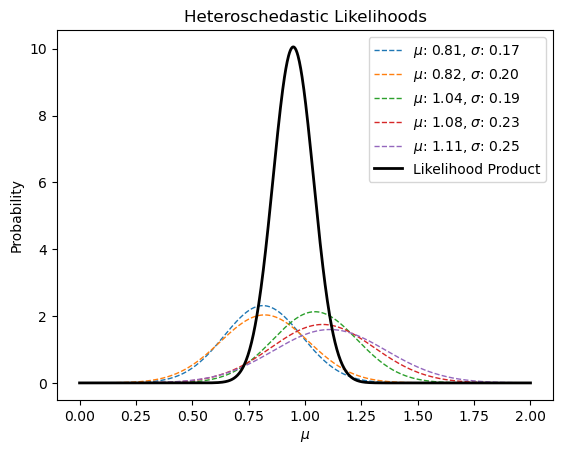

In [30]:
L_i = 1

for i in range(N):
    data_i[i] = sp.norm(mean, sigma_i[i]).rvs()

plt.figure()

for i in range(N):
    plt.plot(x, sp.norm.pdf(x, data_i[i], sigma_i[i]), lw = 1, ls='--', label = '$\mu$: %.02f' %data_i[i] + ', $\sigma$: %.02f' %sigma_i[i])
    L_i *= sp.norm.pdf(x, data_i[i], sigma_i[i])

# PROFESSOR's SOLUTION
# Likelihood_i = np.array([sp.norm.pdf(x, loc = s, scale = ss) for s,ss in zip(data_i, sigma_i)])
# L_i = np.prod(Likelihood_i,axis=0)

# print(np.shape(Likelihood_i))
# max_position_i = np.argsort(Likelihood_i)[-1]
# Max_i = x[max_position_i]

plt.plot(x, L_i, lw = 2, color = 'black', label = 'Likelihood Product')
plt.title('Heteroschedastic Likelihoods')
plt.xlabel('$\mu$')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [31]:
max_position_i = np.argsort(L_i)[-1]
Max_i = x[max_position_i]

weights = 1/(sigma_i)**2

# Th weighted mean and standard deviation of the mean
w_mean = np.sum(data_i * weights) / np.sum(weights)
w_sigma_mean = 1/np.sqrt(np.sum(weights))

Mean: 1.00
Maximum likelihood: 0.95


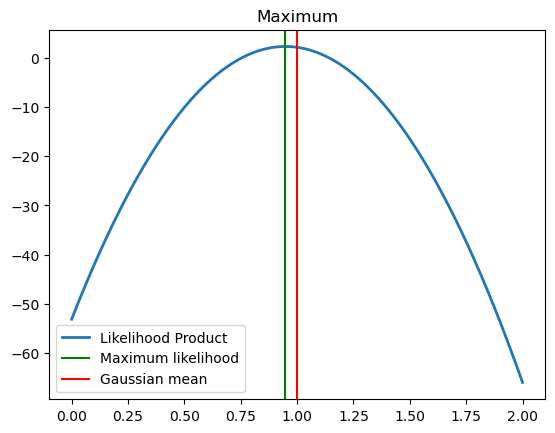

In [34]:
print('Mean: %.02f' %mean)
print('Maximum likelihood: %.02f' %Max_i)

plt.plot(x, np.log(L_i), lw = 2, label = 'Likelihood Product')
plt.axvline(Max_i, c = 'green', label = 'Maximum likelihood')
plt.axvline(mean, c = 'red', label = 'Gaussian mean')
plt.title('Maximum')
plt.legend()
plt.show()

Weighted mean of the gaussians: 0.95 weighted sigma mean: 0.09
Maximum likelihood: 0.95 Fisher Sigma: 0.09


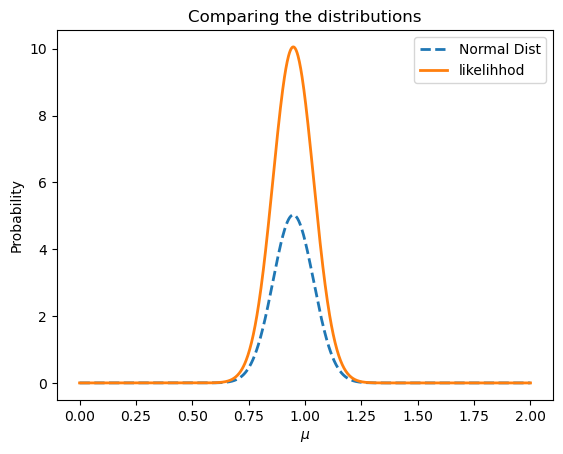

In [36]:
print('Weighted mean of the gaussians: %.02f' %w_mean, 'weighted sigma mean: %.02f' %w_sigma_mean)

sec_deriv_i = np.diff(np.log(L_i), n = 2) / (x[1] - x[0])**2
sigma_mu_i = np.sqrt(1/sec_deriv_i[max_position_i] * (-1))

print('Maximum likelihood: %.02f' %Max_i, 'Fisher Sigma: %.02f' %sigma_mu_i)

normal_dist_2 = sp.norm.pdf(x, w_mean, w_sigma_mean)
Rescaling = L_i[max_position_i] / normal_dist_2[np.argsort(normal_dist_2)[-1]] * 0.5

#Comparing the plots
plt.plot(x, Rescaling * normal_dist_2, ls = '--', lw = 2, label = 'Normal Dist')
plt.plot(x, L_i, lw = 2, label = 'likelihhod')
plt.legend()
plt.title('Comparing the distributions')
plt.xlabel('$\mu$')
plt.ylabel('Probability')
plt.show()

